# **Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Nickolas Winters

**Part 2:** Descriptor Calculation and Exploratory Data Analysis was performed.

## **Load bioactivity data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('amyloid_03_bioactivity_data_classed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermediate
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermediate


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL311039,5000.0,intermediate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1183,CHEMBL5274298,1030.0,intermediate,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...
1184,CHEMBL5283067,990.0,active,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...
1185,CHEMBL5273520,100.0,active,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...
1186,CHEMBL5282081,1560.0,intermediate,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1183,510.448,-0.85390,7.0,13.0
1184,680.640,4.43222,6.0,15.0
1185,624.620,5.52076,7.0,13.0
1186,552.491,4.81824,4.0,10.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1183,510.448,-0.85390,7.0,13.0
1184,680.640,4.43222,6.0,15.0
1185,624.620,5.52076,7.0,13.0
1186,552.491,4.81824,4.0,10.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermediate
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermediate


Now, let's combine the 2 DataFrame

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermediate,510.448,-0.85390,7.0,13.0
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active,680.640,4.43222,6.0,15.0
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active,624.620,5.52076,7.0,13.0
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermediate,552.491,4.81824,4.0,10.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [13]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [14]:
df_combined.standard_value.describe()

count    1.188000e+03
mean     2.334128e+04
std      8.556325e+04
min     -1.000000e+00
25%      1.790000e+02
50%      3.865000e+03
75%      1.711750e+04
max      1.655000e+06
Name: standard_value, dtype: float64

In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

The norm_value() function was applied first so that the values in the standard_value column are normalized.

In [18]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/lj/n_54qj7x37j8cycdp5dnpb8m0000gn/T/ipykernel_2545/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermediate,510.448,-0.85390,7.0,13.0,1030.0
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,990.0
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,100.0
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermediate,552.491,4.81824,4.0,10.0,1560.0


In [19]:
df_norm.standard_value_norm.describe()

count    1.188000e+03
mean     2.334128e+04
std      8.556325e+04
min     -1.000000e+00
25%      1.790000e+02
50%      3.865000e+03
75%      1.711750e+04
max      1.655000e+06
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final

/var/folders/lj/n_54qj7x37j8cycdp5dnpb8m0000gn/T/ipykernel_2545/3236955376.py:8: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))
/var/folders/lj/n_54qj7x37j8cycdp5dnpb8m0000gn/T/ipykernel_2545/3236955376.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermediate,510.448,-0.85390,7.0,13.0,5.987163
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermediate,552.491,4.81824,4.0,10.0,5.806875


In [21]:
df_final.pIC50.describe()

count    1187.000000
mean        5.764696
std         1.336165
min         2.781202
25%         4.765613
50%         5.412289
75%         6.744727
max         9.522879
Name: pIC50, dtype: float64

In [22]:
df_final[df_final.pIC50.notna()]

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermediate,510.448,-0.85390,7.0,13.0,5.987163
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermediate,552.491,4.81824,4.0,10.0,5.806875


Let's write this to CSV file.

In [23]:
# df_final.to_csv('amyloid_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
The ``intermediate`` class was removed from the data set.

In [24]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1178,CHEMBL5290033,Cc1ccc(NCC[C@@H]2CCCN3CCCC[C@H]23)c2c(=O)c3ccc...,inactive,390.527,5.32112,1.0,4.0,4.886057
1179,CHEMBL5283881,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)C[C@@H](O)[C...,active,671.879,5.56660,4.0,6.0,7.318759
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000


Let's write this to CSV file.

In [25]:
# df_2class.to_csv('amyloid_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [26]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

Text(0, 0.5, 'Frequency')

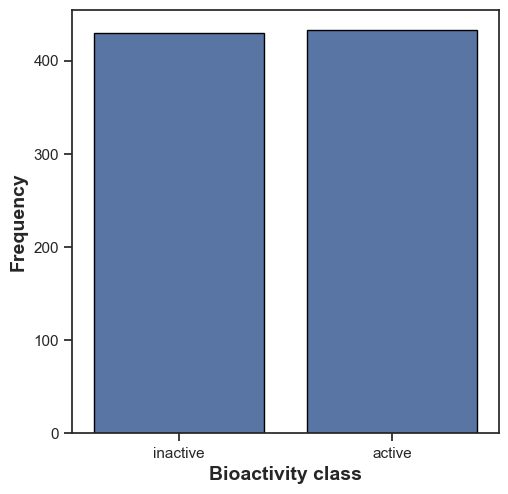

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

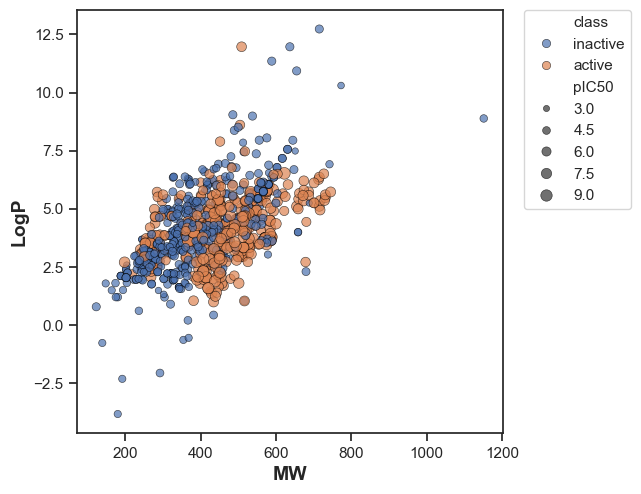

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

Text(0, 0.5, 'pIC50 value')

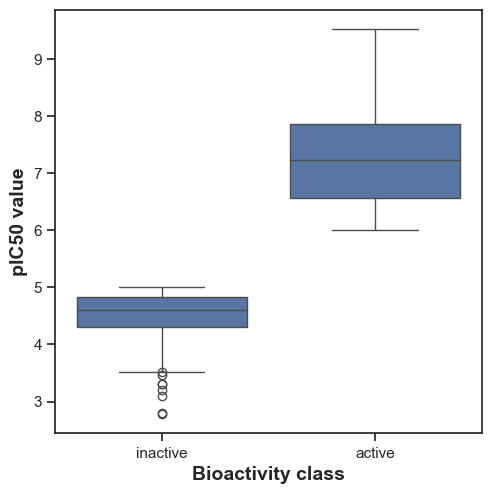

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [30]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(42)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  # results.to_csv(filename)

  return results

In [40]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### **MW**

Text(0, 0.5, 'MW')

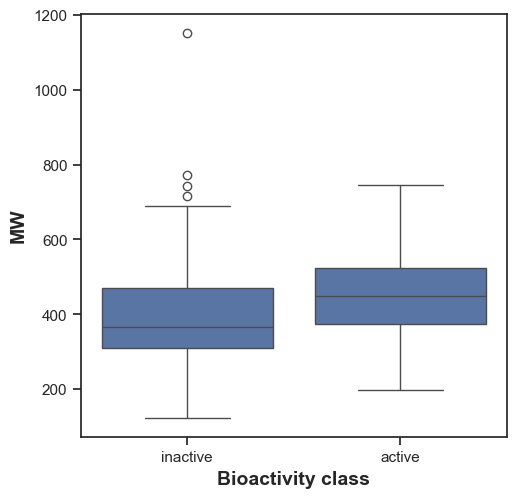

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

#plt.savefig('plot_MW.pdf')

In [33]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,119998.0,2.017137e-13,0.05,Different distribution (reject H0)


#### **LogP**

Text(0, 0.5, 'LogP')

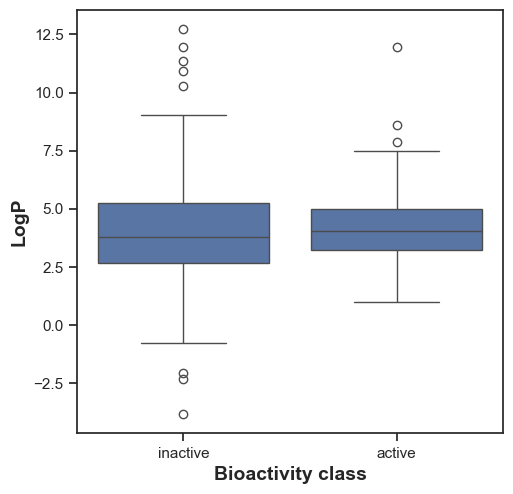

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

#plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,98977.5,0.108164,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

Text(0, 0.5, 'NumHDonors')

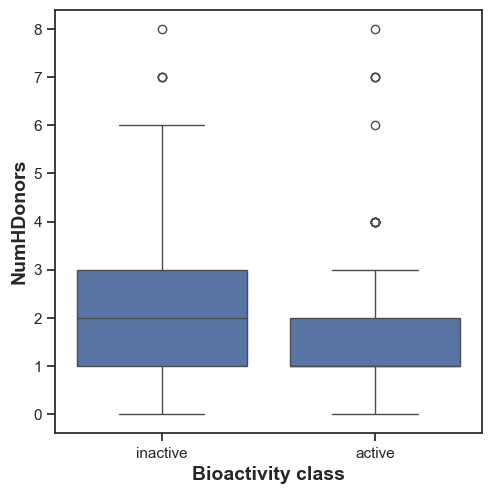

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

#plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,75564.0,7.287576e-07,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

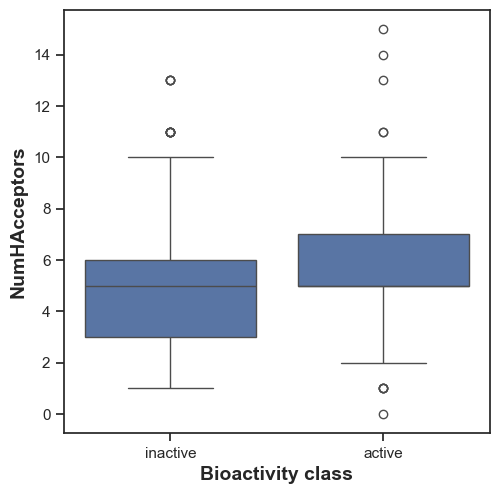

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

#plt.savefig('plot_NumHAcceptors.pdf')

In [39]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,118578.0,1.645117e-12,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Besides the LogP, the remaining Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.